# Pupose
Estimate total area of Anchroage parking lots. 

In [19]:
%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import osmnx as ox

In [21]:
tags = {"parking": True}
anchorage = ox.geometries_from_place("Anchorage, Alaska, USA", tags)
anchorage.shape

(527, 55)

<AxesSubplot: >

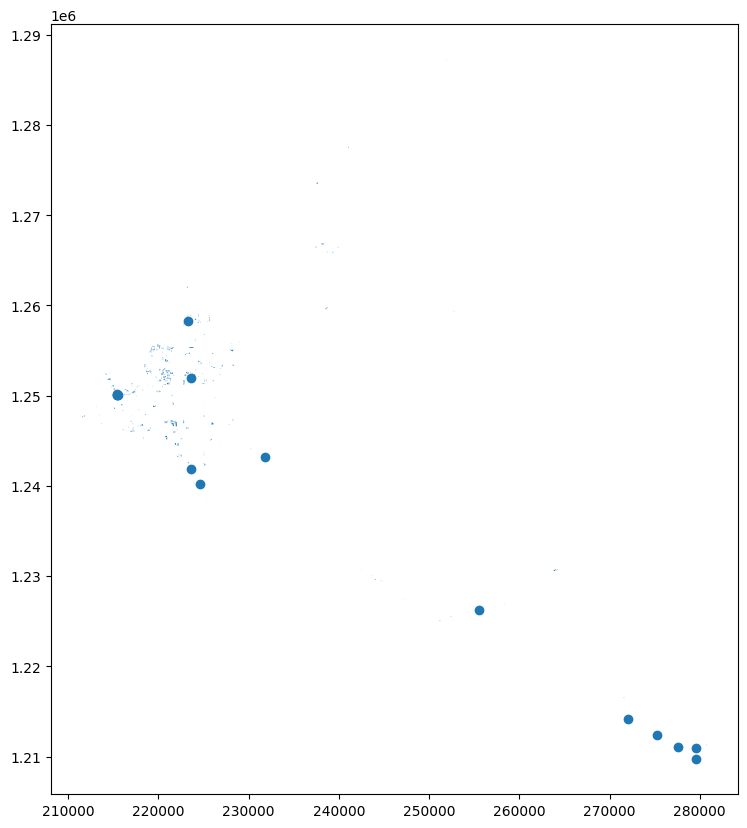

In [32]:
anchorage.plot(figsize=(15,10))

In [33]:
anchorage.crs

<Derived Projected CRS: EPSG:3338>
Name: NAD83 / Alaska Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Alaska.
- bounds: (172.42, 51.3, -129.99, 71.4)
Coordinate Operation:
- name: Alaska Albers (meters)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [34]:
anchorage = anchorage.to_crs("EPSG:3338")

In [35]:
anchorage.groupby("element_type").count()

,amenity,parking,geometry,name,operator,nodes,access,surface,building,capacity,...,brand:wikipedia,operator:wikidata,operator:wikipedia,covered,email,opening_hours,start_date,wikidata,wikipedia,landuse
element_type,,,,,,,,,,,,,,,,,,,,,
node,14,15,15,2,3,0,6,3,0,0,...,0,0,0,0,0,0,0,0,0,0
relation,3,3,3,0,1,3,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
way,505,509,509,48,46,509,329,96,23,8,...,2,2,2,1,1,1,1,1,1,1


In [36]:
# A football field is 1.32 acres https://www.stack.com/a/how-many-acres-is-a-football-field/#:~:text=If%20you%20calculate%20the%20entire,about%201.32%20acres%20in%20size.
# Alaska Albers projection uses meters so we need to convert acres to meters squared

football_area = 5341.85 # in m^2 

anchorage.area.sum() / football

471.8088310797288